In [8]:
import utils.file_utils as fu
import pandas as pd
import matplotlib.pyplot as plt
import sys
import yaml
from scipy.signal import argrelextrema
import numpy as np
RAW_REFERENCE_PATH="../../data/raw_reference.csv"

In [176]:
df=pd.read_csv(open(RAW_REFERENCE_PATH))
df.head()

,LGRF_GRFx,LGRF_GRFy,moments_ankle_l,moments_ankle_r,moments_hip_l,moments_hip_r,moments_knee_l,moments_knee_r,stim_bifemlh_l,stim_bifemlh_r,...,f_se_med_gas_l,f_se_med_gas_r,f_se_psoas_l,f_se_psoas_r,f_se_soleus_l,f_se_soleus_r,f_se_tib_ant_l,f_se_tib_ant_r,f_se_vas_int_l,f_se_vas_int_r
0,3.834637e-238,-1.539135e-236,0.000000,0.000000,0.000000,0.000000,0.261799,0.261799,0.051269,0.051269,...,8.273674,8.273674,42.610185,42.610185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.785546e-224,2.390626e-224,1.612957,1.612957,-7.256792,-7.256792,-1.453763,-1.453763,0.051269,0.051269,...,35.090704,35.090704,70.651242,70.651242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-7.799029e-226,-7.774383e-226,-0.160713,-0.160713,-5.307398,-5.307398,-2.250932,-2.250932,0.051269,0.051269,...,30.631664,30.631664,58.106772,58.106772,2.914904,2.914904,48.175144,48.175144,0.000000,0.000000
3,-4.086860e-224,-3.926997e-224,-2.766172,-2.766172,10.720970,10.720970,3.566745,3.566745,0.051269,0.051269,...,33.654955,33.654955,54.953193,54.953193,24.816119,24.816119,148.568704,148.568704,0.000000,0.000000
4,-1.642943e-224,-2.098905e-224,-0.630413,-0.630413,12.045867,12.045867,4.003205,4.003205,0.051269,0.051269,...,71.784644,71.784644,54.956494,54.956494,75.514010,75.514010,177.765493,177.765493,32.478239,32.478239


In [181]:
fy=df.filter(like="Fy",axis=1)
fy.columns=['left','right']
fy.head()

,left,right
0,-1.539135e-236,-1.539135e-236
1,2.390626e-224,2.390626e-224
2,-7.774383e-226,-7.774383e-226
3,-3.926997e-224,-3.926997e-224
4,-2.098905e-224,-2.098905e-224


In [182]:
def add_strike_lift(df):
    n=50 # number of points to be checked before and after 
    left_swing = argrelextrema(df.left.values, np.less_equal, order=n)
    s=left_swing[0]
    
    s_filter=[s[idx+1] for idx in range(len(s)-1) if s[idx+1]-s[idx]>10 ]
    #s_filter.append(s[0])
    
    df['l_lift']=df.iloc[s_filter]['left']
    df['l_off']=df.iloc[s]['left']
    
    right_swing=argrelextrema(df.right.values, np.less_equal, order=n)#[0]['right']
    s=right_swing[0]
    s_filter=[s[idx+1] for idx in range(len(s)-1) if s[idx+1]-s[idx]>10 ]
    #s_filter.append(s[0])
    df['r_lift']=df.iloc[s_filter]['right']
    df['r_off']=df.iloc[s]['right']
    
    df['r_strike'] = df.iloc[argrelextrema(df.right.values, np.greater_equal, order=n)[0]]['right']
    df['l_strike'] = df.iloc[argrelextrema(df.left.values, np.greater_equal, order=n)[0]]['left']
    
    return df

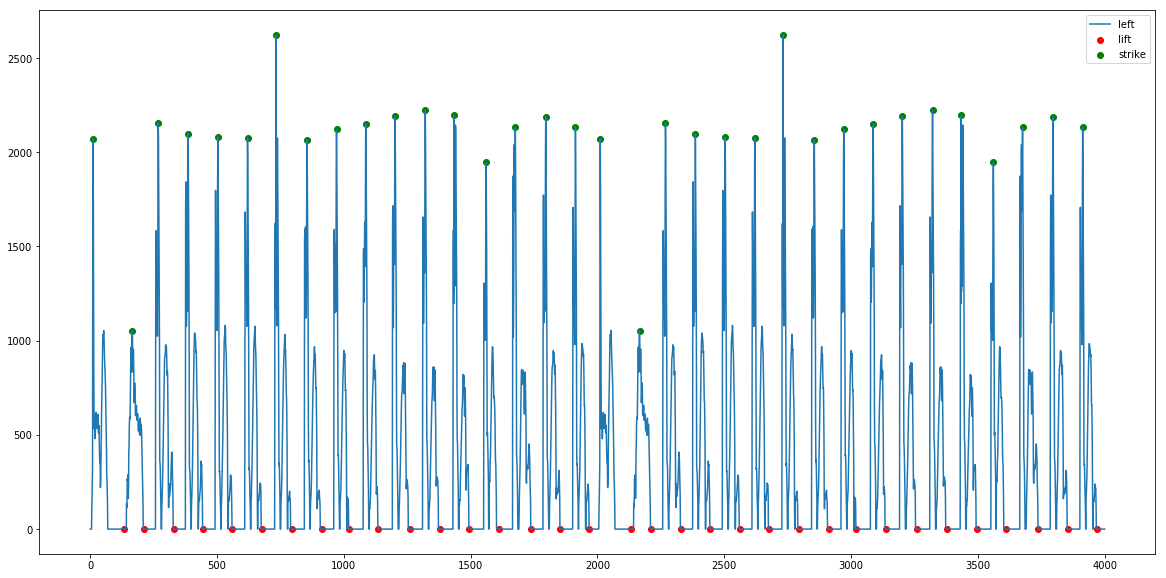

In [183]:
c_fy=fy.copy()
add_strike_lift(c_fy)
plt.figure(figsize=(20,10))

plt_samp=c_fy#[1:1000]
# Plot results
plt.scatter(plt_samp.index, plt_samp['l_lift'], c='r',label="lift")
plt.scatter(plt_samp.index, plt_samp['l_strike'], c='g',label="strike")
#plt.scatter(fy_df.index, fy_df['l_off'], c='b')
plt.plot(plt_samp.index, plt_samp['left'])
plt.legend()
plt.show()

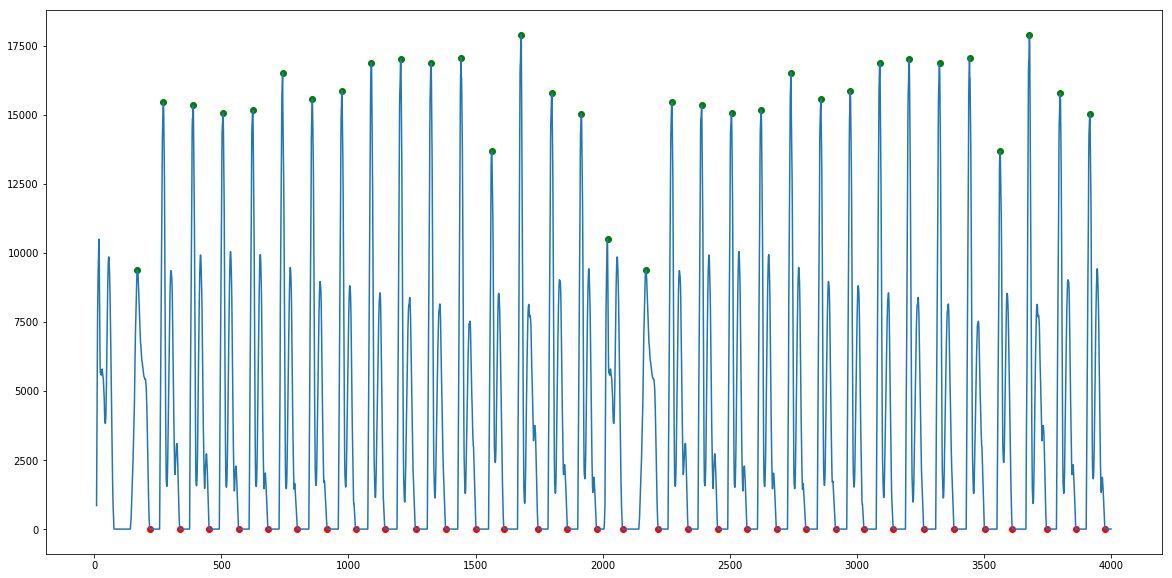

In [184]:
r=fy.rolling(10)
fy_df=r.sum()
add_strike_lift(fy_df)

plt.figure(figsize=(20,10))
# Plot results
plt_samp=fy_df#[1:1000]
plt.scatter(plt_samp.index, plt_samp['l_lift'], c='r')
plt.scatter(plt_samp.index, plt_samp['l_strike'], c='g')
#plt.scatter(fy_df.index, fy_df['l_off'], c='b')
plt.plot(plt_samp.index, plt_samp['left'])
plt.show()

> Less false lift detection on filtered version, but loose first stride. Not that bad as the first stride in simulation depends more of the initial position than of the model